# Лабораторная работа № 14
<font size="4">Задание 8.1. 
    
Загрузить библиотеку numpy, файл bin.jpg и преобразовать его с помощью операций дилатация и эрозия. Выбрать ядро, размер которого равен последней цифре в номере списка группы. Здесь ядро 5×5. Выполним сначала операцию дилатации, затем и эрозии.

In [55]:
import cv2
import numpy as np
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [56]:
img = cv2.imread('sunn.jpg',0)

In [57]:
kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(img,kernel,iterations = 1)
erosion = cv2.erode(img, kernel,iterations = 1)

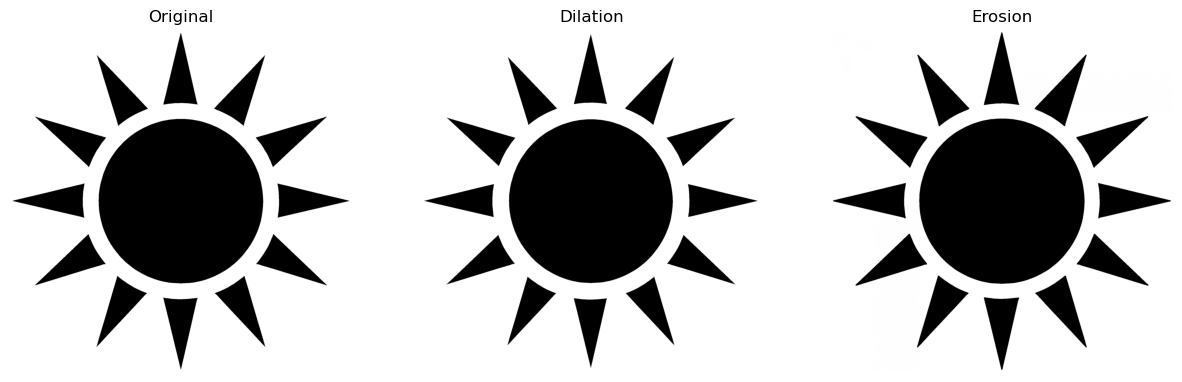

In [58]:
plt.figure(figsize=(15,15))

plt.subplot(131),
plt.imshow(img,cmap = 'gray'),plt.title("Original"),
plt.axis('off')

plt.subplot(132),
plt.imshow(dilation,cmap = 'gray'),plt.title("Dilation"),
plt.axis('off')

plt.subplot(133),
plt.imshow(erosion,cmap = 'gray'),plt.title("Erosion"),
plt.axis('off');

<font size="4">Задание 8.2

Для демонстрации удаления шума создать зашумленный файл, затем к зашумленному файлу применить операцию открытия.

In [59]:
image = Image.open('sunn.jpg')

In [60]:
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 150)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))

In [62]:
image.save("median.png", "JPEG")
median = cv2.imread("median.png", 1)

(-0.5, 1919.5, 1919.5, -0.5)

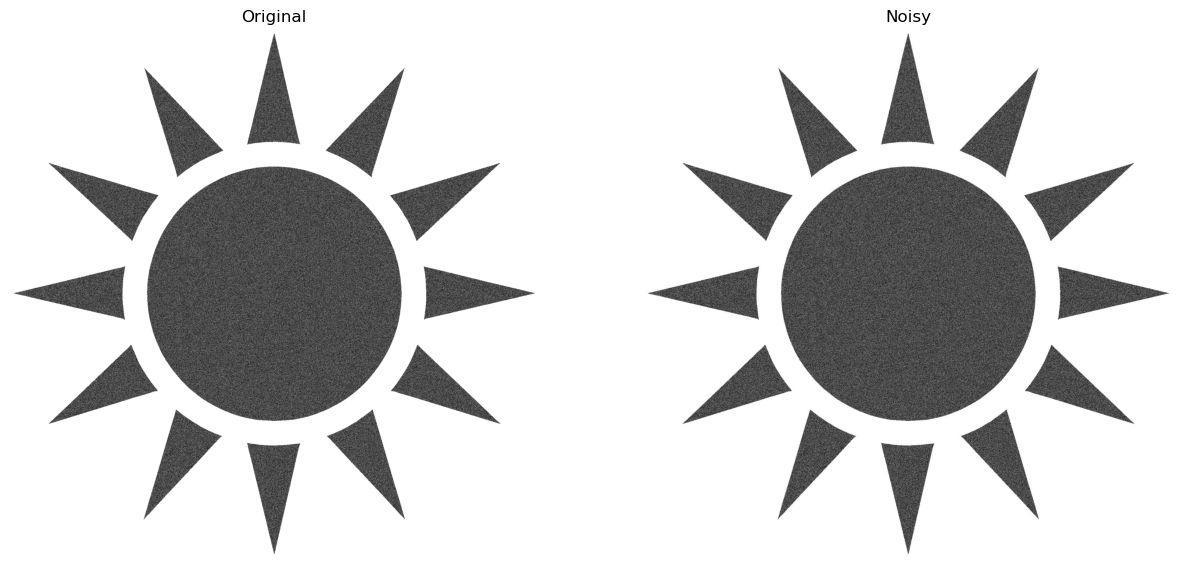

In [64]:
plt.figure(figsize=(15,15))

plt.subplot(121),
plt.imshow(image,cmap = 'gray'),plt.title("Original"),
plt.axis('off')

plt.subplot(122)
plt.imshow(median, cmap='gray'),plt.title("Noisy")
plt.axis('off')

<font size="4">Задание 8.3. 
    
Трансформировать цветное изображение в полутоновое при его загрузке, к полутоновому файлу применить операцию открытия.

In [65]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))

In [66]:
opening = cv2.morphologyEx(median, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(median, cv2.MORPH_CLOSE, kernel)

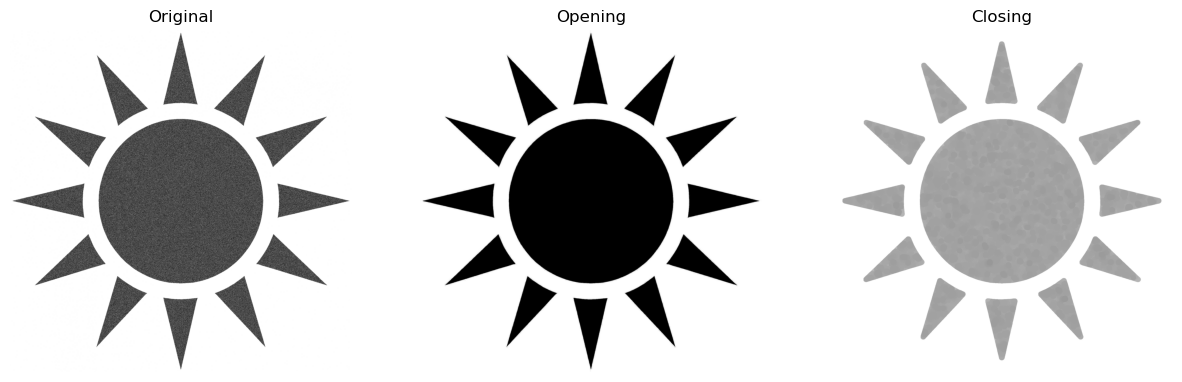

In [67]:
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(132)
plt.imshow(opening, cmap='gray')
plt.title("Opening")
plt.axis('off')

plt.subplot(133)
plt.imshow(closing, cmap='gray')
plt.title("Closing")
plt.axis('off')

plt.show();

<font size="4">Задание 8.4. 

Трансформировать цветное изображение в полутоновое при его загрузке. Скопировать полутоновое изображение. К первому изображению применить операцию расширения, ко второму эрозию. Затем вычесть из расширенного изображения изображение после эрозии. Результат похож на контур объекта.

In [75]:
image = cv2.imread('hills.jpg')

In [76]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
copied_image = gray_image.copy()

In [77]:
kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(gray_image, kernel, iterations=1)

In [78]:
eroded_image = cv2.erode(copied_image, kernel, iterations=1)
result_image = dilated_image - eroded_image

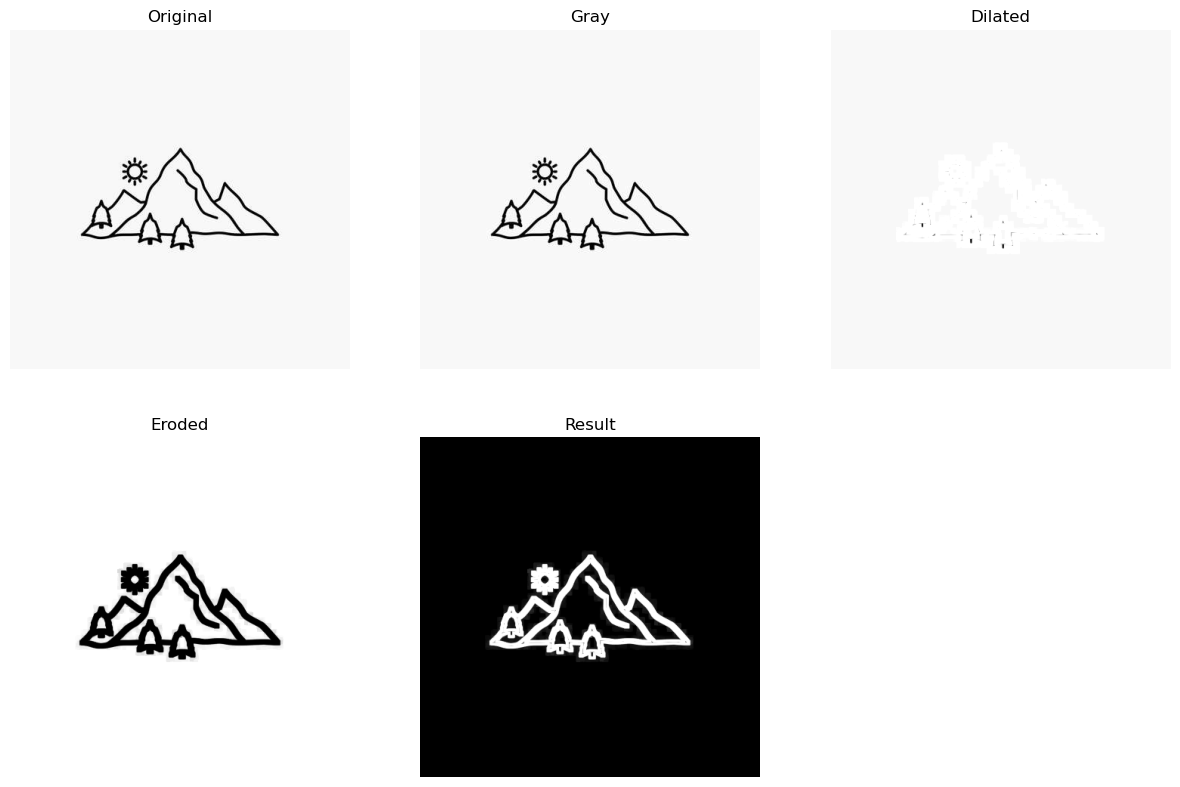

In [79]:
plt.figure(figsize=(15,15))

plt.subplot(331)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(332)
plt.imshow(gray_image, cmap='gray')
plt.title("Gray")
plt.axis('off')

plt.subplot(333)
plt.imshow(dilated_image, cmap='gray')
plt.title("Dilated")
plt.axis('off')

plt.subplot(334)
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded")
plt.axis('off')

plt.subplot(335)
plt.imshow(result_image, cmap='gray')
plt.title("Result")
plt.axis('off')

plt.show()

<font size="4">Задание 8.5. 

Применить операцию цилиндр к изображению, размер ядра равен 40 + №, № – номер по списку группы.

In [94]:
image = cv2.imread("rroom.jpg")

In [109]:
result = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, (59,59))

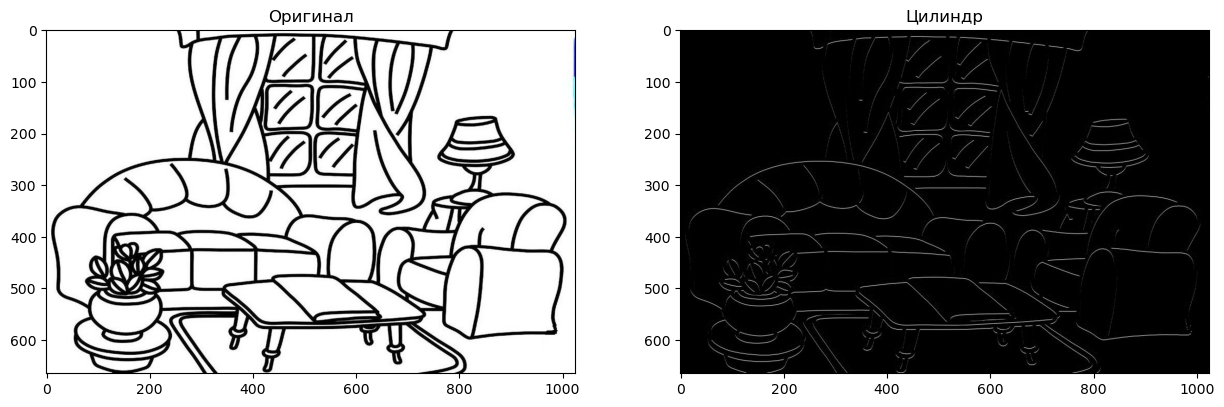

In [110]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.title("Оригинал")

plt.subplot(122)
plt.imshow(result, cmap="gray")
plt.title("Цилиндр")

plt.show()

<font size="4">Задание 8.6. 

Применить операцию черная шляпа к изображению, размер ядра равен 40 + №, № – номер по списку группы.

In [103]:
result = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, (59,59))

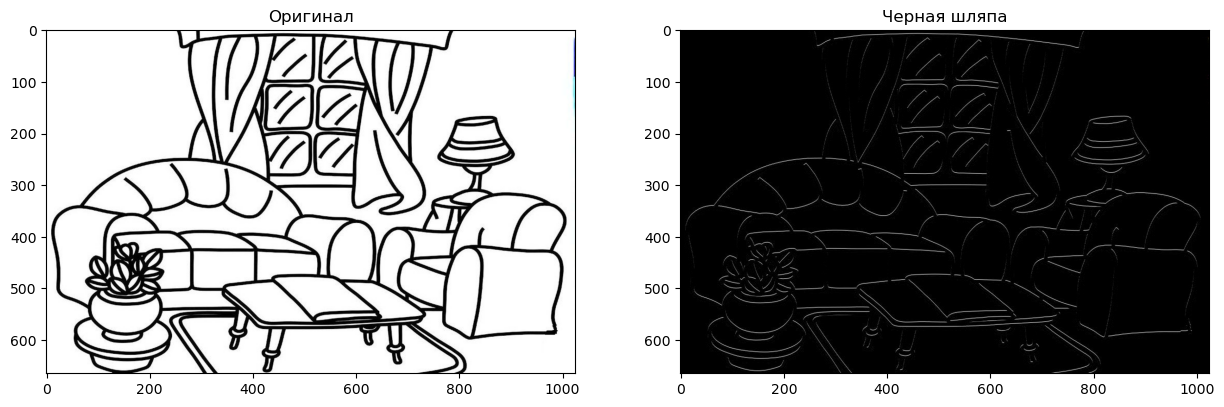

In [104]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image, cmap="gray")
plt.title("Оригинал")

plt.subplot(122)
plt.imshow(result, cmap="gray")
plt.title("Черная шляпа")

plt.show()

<font size="4">Задание 8.7.

Изготовить ядро, его размер выбрать из ряда 3x3, 3x5, 5x3, 5x5, 5x7, 3x7, 7x3, 7x5, 5x7, 7x7, номер варианта должен быть равен номеру по списку группы

In [105]:
img = cv2.resize(image, (900, 600))

In [106]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

In [107]:
result1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
result2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)

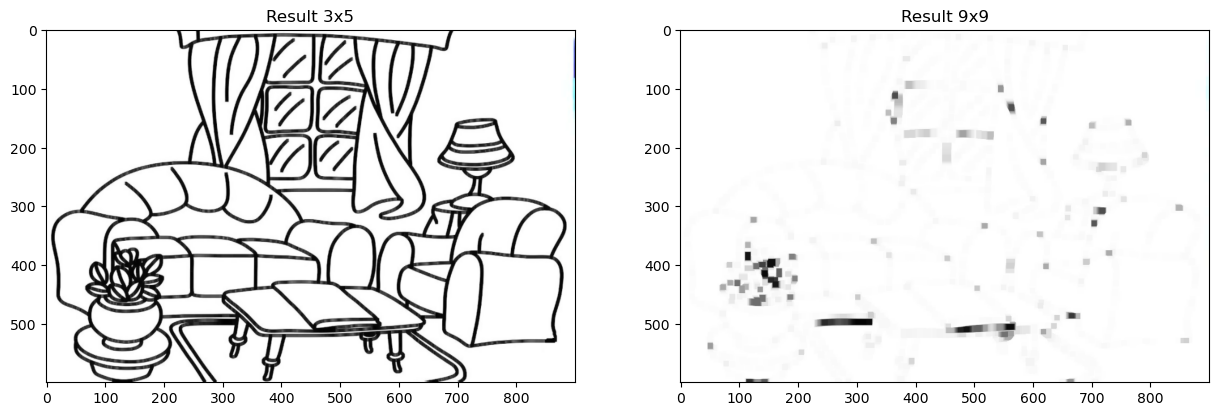

In [108]:
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(result1, cmap="gray")
plt.title("Result 3x5")

plt.subplot(122)
plt.imshow(result2, cmap="gray")
plt.title("Result 9x9")

plt.show();